### Linear Regression and Boston Data Set

- Load Boston Data Set from `sklearn.datasets`, use 

```
from sklearn.datasets import load_boston
boston = load_boston()
```
- Assign `data` to `X` and `target` to `y`


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.metrics import mean_squared_error

In [2]:
housing = fetch_california_housing()

In [3]:
# create a DataFrame from the data

df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df['MedHouseVal'] = housing.target

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
y = df['MedHouseVal']
X = df.drop(columns='MedHouseVal')

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


- Check the shape of the dataset

In [9]:
X.shape

(20640, 8)

In [10]:
y.shape

(20640,)

- Plot the scatter plot of each attribute versus `MEDV`

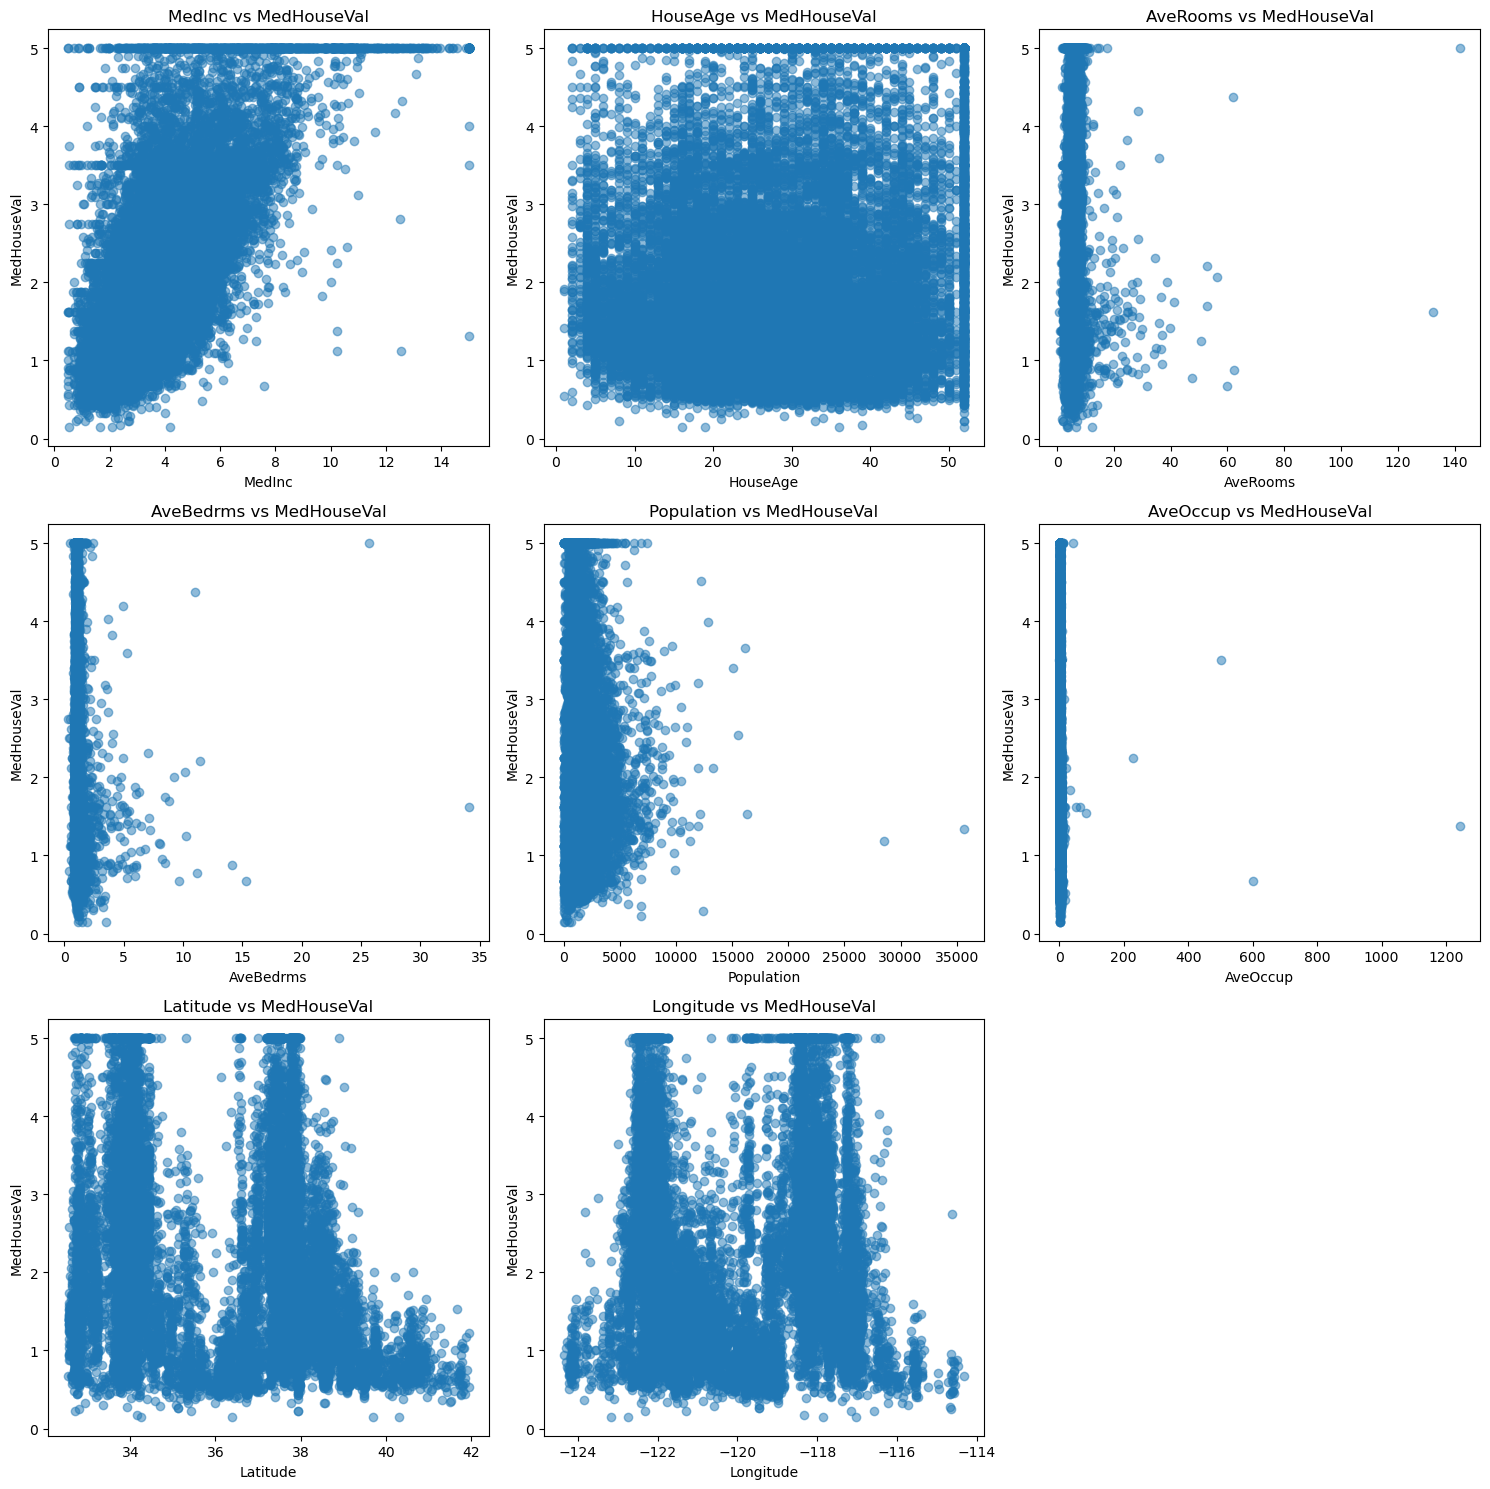

In [11]:
# define the features and the target

features = df.columns[:-1]  # all columns except the last one which is the target
target = 'MedHouseVal'

# Create scatterplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target], alpha=0.5)
    axes[i].set_title(f"{feature} vs {target}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

# remove any unused subplots

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

- Split the dataset into test and train datasets, you can set the random seed to 42 by `random_state=42`

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- run cross validation for the train and test datasets for `cv=10`
- print the mean score for the cross validation using linear regressor (`LinearRegressor()`)
- do the same two steps above for random forest regressor. For that you can import
```
from sklearn.ensemble import RandomForestRegressor
```

## Linear Regression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train);

In [15]:
np.mean(cross_val_score(lr, X_train, y_train, cv=10))

0.6062585589652909

## Ridge Regression

In [16]:
rr = Ridge()

In [17]:
rr.fit(X_train, y_train);

In [18]:
np.mean(cross_val_score(rr, X_train, y_train, cv=10))

0.6062578193430905

## Lasso Regression

In [19]:
las = Lasso()

In [20]:
las.fit(X_train, y_train);

In [21]:
np.mean(cross_val_score(las, X_train, y_train, cv=10))

0.28612607551892555

## Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfr = RandomForestRegressor()

In [24]:
rfr.fit(X_train, y_train);

In [25]:
# np.mean(cross_val_score(rfr, X_train, y_train, cv=10))

## Boston Housing Data with Polynomials

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model

## Scale the Dataset

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(X_train);

In [29]:
X_train_scaled = scaler.transform(X_train)

In [30]:
X_test_scaled = scaler.transform(X_test)

## Polynomials

In [31]:
# initialize  Polynominal Features

poly = PolynomialFeatures(include_bias=False)

In [32]:
# apply polynomial features to dataset

X_poly = poly.fit_transform(scale(X))

In [33]:
# get the new feature names

poly_feature_names = poly.get_feature_names_out(housing.feature_names)

In [34]:
# create the new DataFrame out of the polynomial features

df_poly = pd.DataFrame(data=X_poly, columns=poly_feature_names)

In [35]:
df_poly.head().T

,0,1,2,3,4
MedInc,2.344766,2.332238,1.782699,0.932968,-0.012881
HouseAge,0.982143,-0.607019,1.856182,1.856182,1.856182
AveRooms,0.628559,0.327041,1.155620,0.156966,0.344711
AveBedrms,-0.153758,-0.263336,-0.049016,-0.049833,-0.032906
Population,-0.974429,0.861439,-0.820777,-0.766028,-0.759847
AveOccup,-0.049597,-0.092512,-0.025843,-0.050329,-0.085616
Latitude,1.052548,1.043185,1.038503,1.038503,1.038503
Longitude,-1.327835,-1.322844,-1.332827,-1.337818,-1.337818
MedInc^2,5.497926,5.439334,3.178017,0.870428,0.000166
MedInc HouseAge,2.302894,-1.415713,3.309014,1.731757,-0.023909


In [36]:
X_train, Y_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [37]:
X_train.shape

(15480, 44)

In [38]:
y_train.shape

(15480,)

## Linear Regression with Polynomials

In [39]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

-75.81299874573932

## Ridge Regression with Polynomials

In [40]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

-64.44249372063852

## Lasso Regression with Polynomials

In [41]:
np.mean(cross_val_score(Lasso(), X_train, y_train, cv=10))

0.03547185459710901

In [42]:
lr = LinearRegression().fit(X_train, y_train)

In [43]:
print("Number of features:", X_poly.shape[1])
print("Number of coefficients:", len(lr.coef_))

Number of features: 44
Number of coefficients: 44


## Graph Linear Coefficients

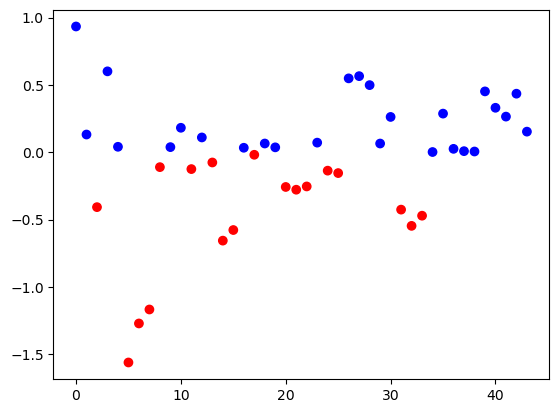

In [44]:
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap='bwr_r');

## Graph Ridge Coefficients

In [45]:
rr = Ridge().fit(X_train, y_train)

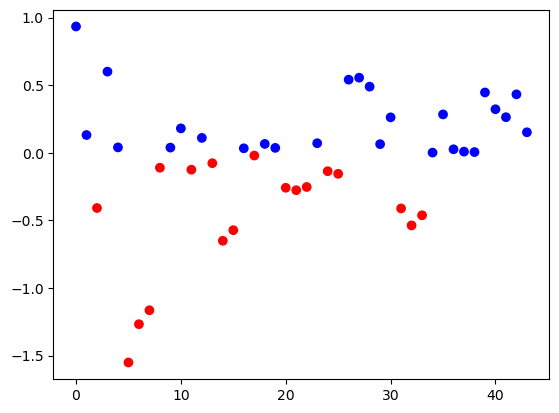

In [46]:
plt.scatter(range(X_poly.shape[1]), rr.coef_, c=np.sign(rr.coef_), cmap='bwr_r');

## Graph Lasso Coefficients

In [47]:
las = Lasso().fit(X_train, y_train)

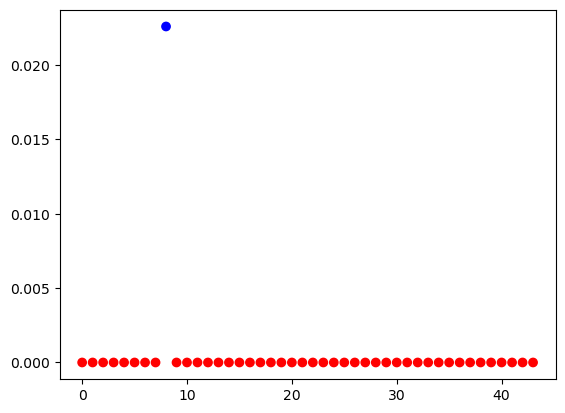

In [48]:
plt.scatter(range(X_poly.shape[1]), las.coef_, c=np.sign(las.coef_), cmap='bwr_r');

## Grid Search Ridge

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
alpha_values = {'alpha':np.logspace(-4,4,50)}
grid_search = GridSearchCV(estimator=rr, param_grid=alpha_values, cv=10)
grid_search.fit(X_train, y_train)

# print the best parameters and the corresponding score

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best score: {grid_search.best_score_}")

Best alpha: 1526.4179671752302
Best score: 0.5373056617067526


In [51]:
rr = Ridge(1526.4179671752302).fit(X_train, y_train)

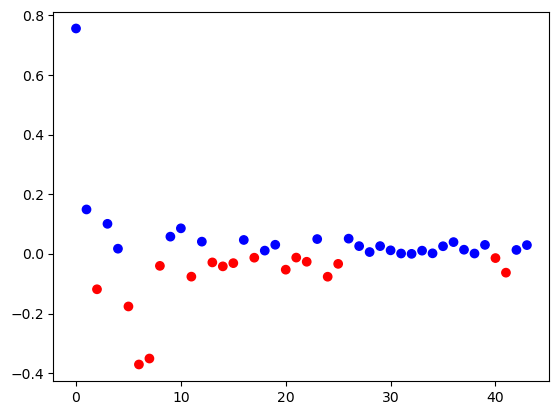

In [52]:
plt.scatter(range(X_poly.shape[1]), rr.coef_, c=np.sign(rr.coef_), cmap='bwr_r');

## Grid Search Lasso

In [53]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [54]:
alpha_values = {'alpha':np.logspace(-4,4,50)}
grid_search = GridSearchCV(estimator=las, param_grid=alpha_values, cv=10)
grid_search.fit(X_train, y_train)

# print the best parameters and the corresponding score

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best score: {grid_search.best_score_}")

Best alpha: 0.019306977288832496
Best score: 0.6015627617832802


In [55]:
las = Lasso(0.019306977288832496).fit(X_train, y_train)

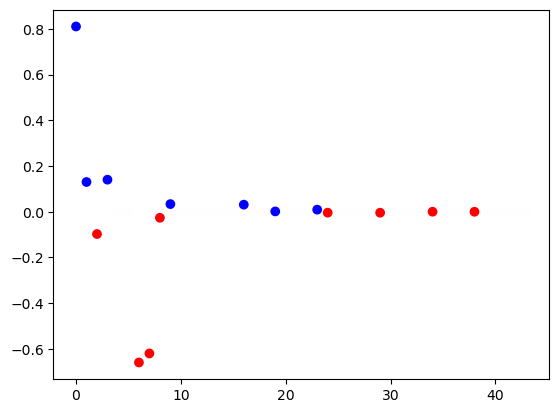

In [56]:
plt.scatter(range(X_poly.shape[1]), las.coef_, c=np.sign(las.coef_), cmap='bwr_r');